In [ ]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

Load Database

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Bakery_Shop.csv')

# Display the first 5 rows
display(df.head())

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [ ]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


Check Duplicates

In [ ]:
df.duplicated().sum()

np.int64(1653)

In [ ]:
df['Item'] = df['Item'].str.lower()

In [ ]:
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [ ]:
df = df.drop(df[df.Item == 'none'].index)

In [ ]:
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


<Axes: xlabel='Item'>

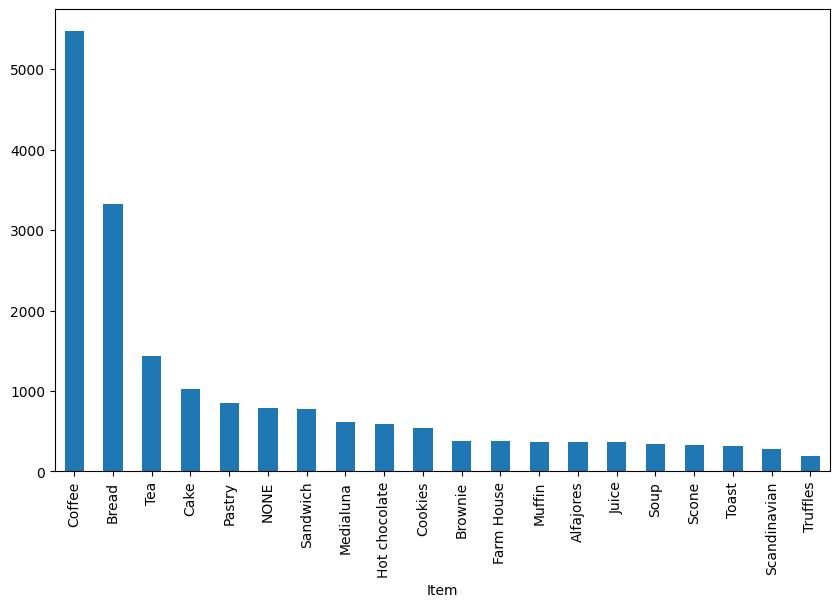

In [ ]:
df['Item'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,6))

In [ ]:
basket=df.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [ ]:
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_zero_one(x):
  if x == 0:
    return 0
  if x > 0:
    return 1

In [ ]:
basket=basket.applymap(encode_zero_one)

In [ ]:
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Find the support for itemsets using Apriori

In [ ]:
itemsets=apriori(basket,min_support=0.01,use_colnames=True)
itemsets

,support,itemsets
0,0.036093,(Alfajores)
1,0.015948,(Baguette)
2,0.324940,(Bread)
3,0.039765,(Brownie)
4,0.103137,(Cake)
...,...,...
58,0.049523,"(Tea, Coffee)"
59,0.023502,"(Toast, Coffee)"
60,0.018256,"(Tea, NONE)"
61,0.014269,"(Tea, Sandwich)"


Visualizing the Support of itemsets

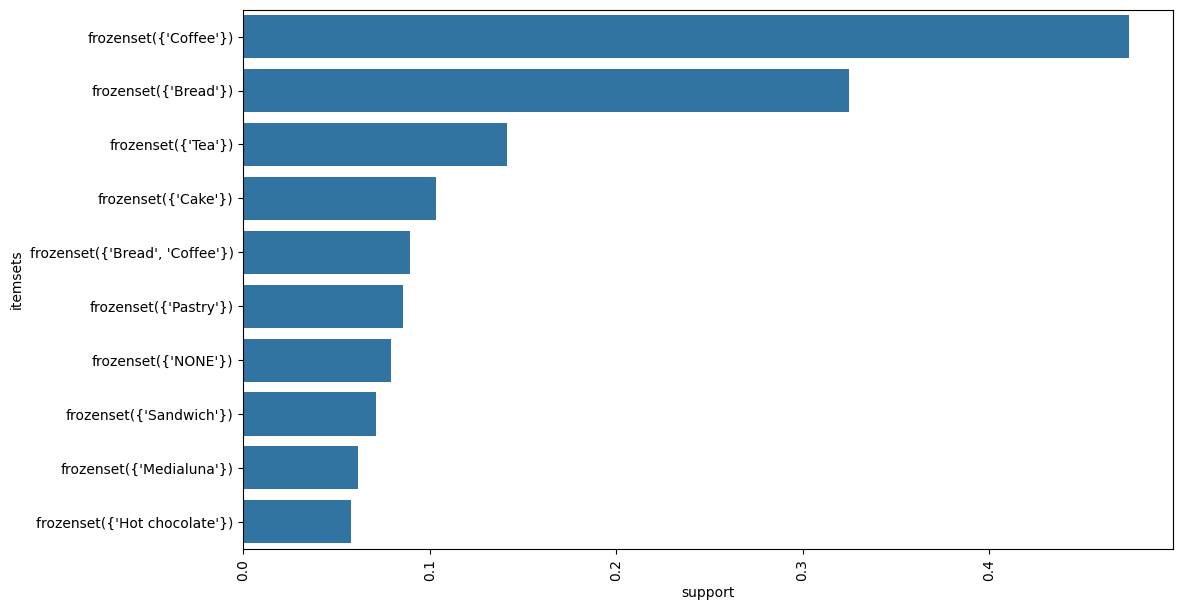

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=itemsets.sort_values('support',ascending=False)['support'][:10],y=itemsets.sort_values('support',ascending=False).iloc[0:10,1])
plt.xticks(rotation=90)
plt.show()

Check the rules using association rules

In [ ]:
basket = association_rules(itemsets, metric ="lift")
basket = basket.sort_values(['lift','confidence'],ascending=[False,False])
basket.head(28)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
18,(Hot chocolate),(Cake),0.057916,0.103137,0.011331,0.195652,1.897010,1.0,0.005358,1.115019,0.501924,0.075683,0.103154,0.152760
19,(Cake),(Hot chocolate),0.103137,0.057916,0.011331,0.109868,1.897010,1.0,0.005358,1.058364,0.527232,0.075683,0.055145,0.152760
46,(Tea),(NONE),0.141643,0.079005,0.018256,0.128889,1.631394,1.0,0.007066,1.057264,0.450893,0.090202,0.054163,0.179982
47,(NONE),(Tea),0.079005,0.141643,0.018256,0.231076,1.631394,1.0,0.007066,1.116309,0.420228,0.090202,0.104190,0.179982
20,(Tea),(Cake),0.141643,0.103137,0.023607,0.166667,1.615972,1.0,0.008999,1.076235,0.444078,0.106736,0.070835,0.197779
21,(Cake),(Tea),0.103137,0.141643,0.023607,0.228891,1.615972,1.0,0.008999,1.113146,0.425012,0.106736,0.101645,0.197779
44,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,1.0,0.007651,1.775789,0.336791,0.048464,0.436870,0.376936
45,(Coffee),(Toast),0.475081,0.033365,0.023502,0.049470,1.482699,1.0,0.007651,1.016943,0.620199,0.048464,0.016661,0.376936
53,(Pastry),"(Bread, Coffee)",0.085510,0.089393,0.011122,0.130061,1.454947,1.0,0.003478,1.046749,0.341928,0.067905,0.044661,0.127237
50,"(Bread, Coffee)",(Pastry),0.089393,0.085510,0.011122,0.124413,1.454947,1.0,0.003478,1.044430,0.343386,0.067905,0.042540,0.127237


Interpretations

The bakery store can provide some combo offer for tea, coffee and cake as they have good lift. The combination of hot chocolate & cake can also be thought of.

A few discount offers on combos:
*   Total with Coffee with 10% discount on breakfast combo
*   Sandwich with tea combo with 5% discount


